In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset

def plot(b):
    plt.plot(b.data["unixtime"], b.data["result"])
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

    
    csv = pd.read_csv("datasets/candlestick2.csv")
    #csv = csv[:5000]
    b = dataset.BitcoinDataset()
    b.set_dataset(csv)
    b.data.to_csv("datasets/train_v4.csv", index=False)
    
    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()

start: 2020/05/05 06:20:55
end: 2020/05/05 06:40:39


KeyboardInterrupt: 

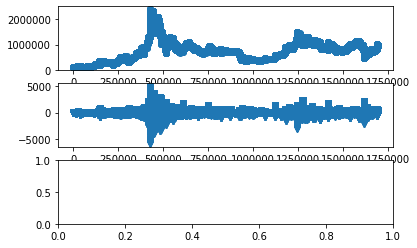

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("datasets/train_v4.csv")
data = csv#[-1000:]
x = list(range(len(data)))
y_close = list(data["close"])
y_result = list(data["result"])
trend = [i > 0 for i in y_result]

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(x, y_close, marker="o")
ax2.plot(x, y_result, marker="v")
ax3.scatter(x, trend, marker="o", color="orange")
plt.show()